<a href="https://colab.research.google.com/github/KayalvizhiT513/WhyMachinesLearn-Algos/blob/main/SVM_ISLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ISLP

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━

In [ ]:
!pip install --upgrade scikit-learn scipy numpy

In [ ]:
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table

In [ ]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [ ]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

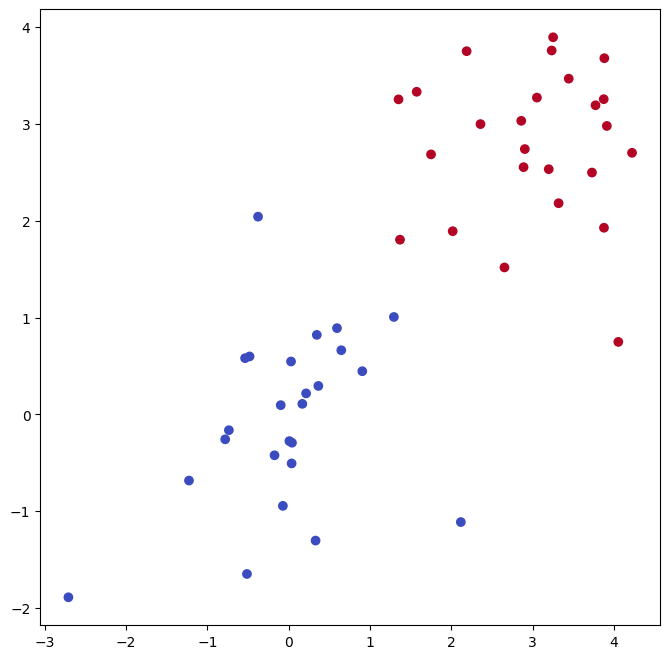

In [ ]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 3
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm);

In [ ]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

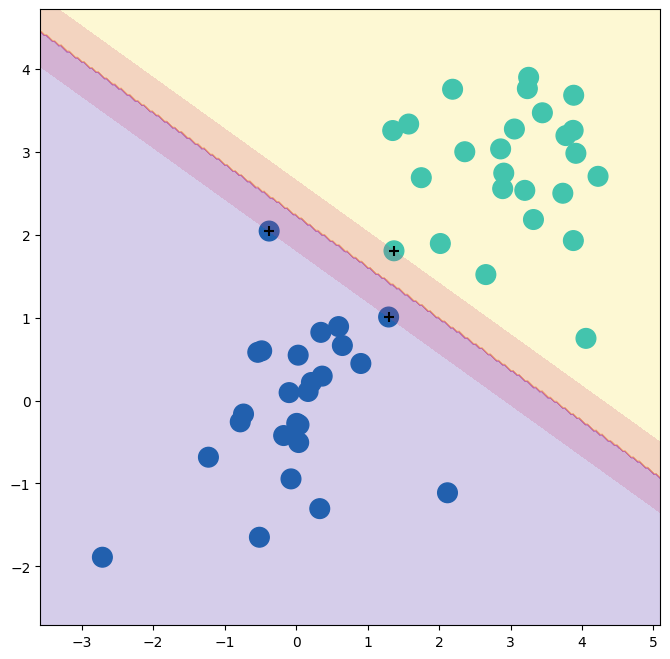

In [ ]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear ,
ax=ax)

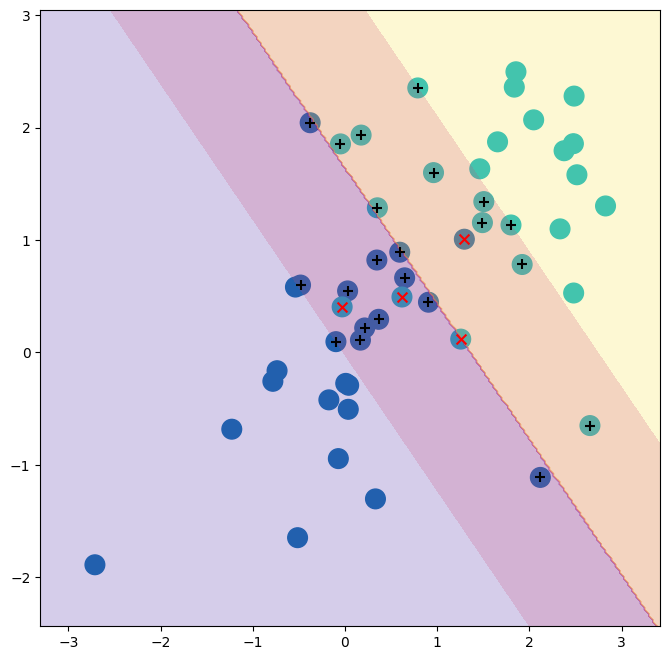

In [ ]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear_small ,
ax=ax)

In [ ]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [ ]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear ,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True ,
cv=kfold ,
scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [ ]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [ ]:
X_test = rng.standard_normal((20, 2))
y_test = np.array ([ -1]*10+[1]*10)
X_test[y_test==1] += 1

In [ ]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [ ]:
svm_ = SVC(C=0.001,
kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


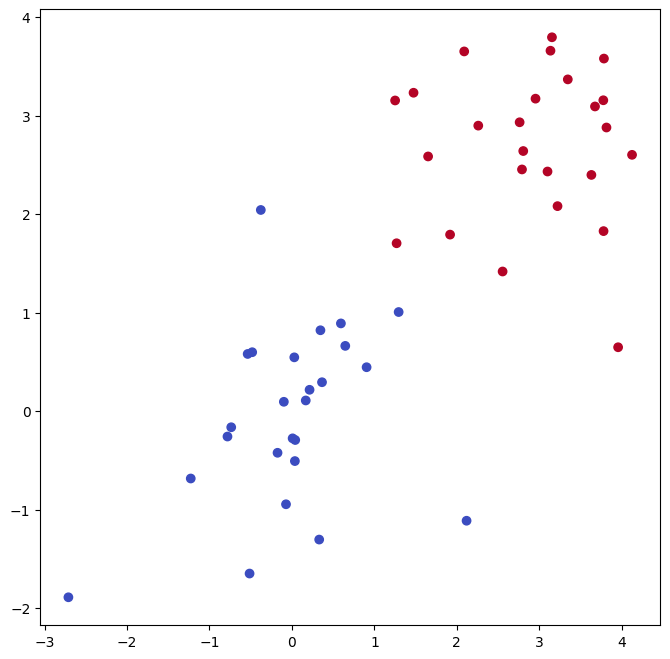

In [ ]:
X[y==1] += 1.9;
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [ ]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


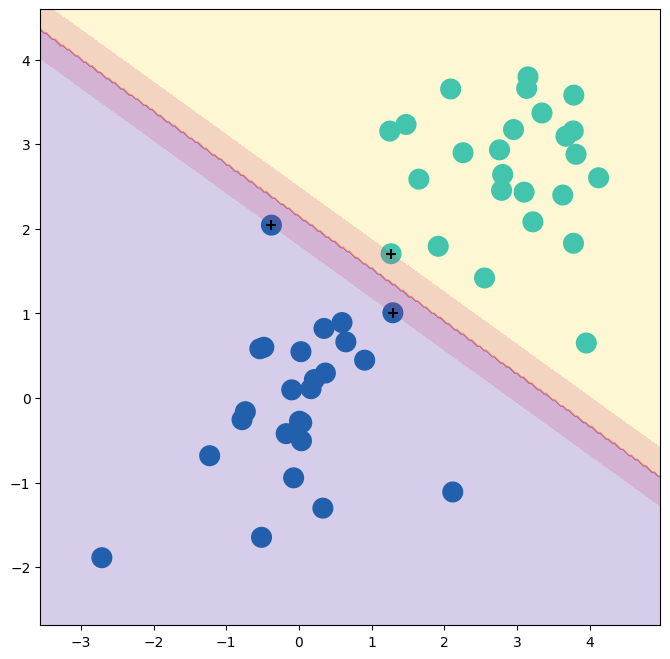

In [ ]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_ ,
ax=ax)

In [ ]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


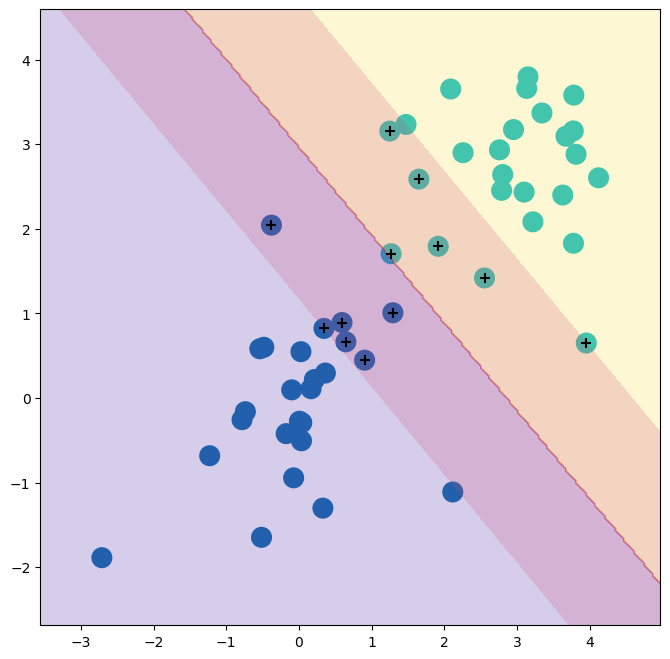

In [ ]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_ ,
ax=ax)

In [ ]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

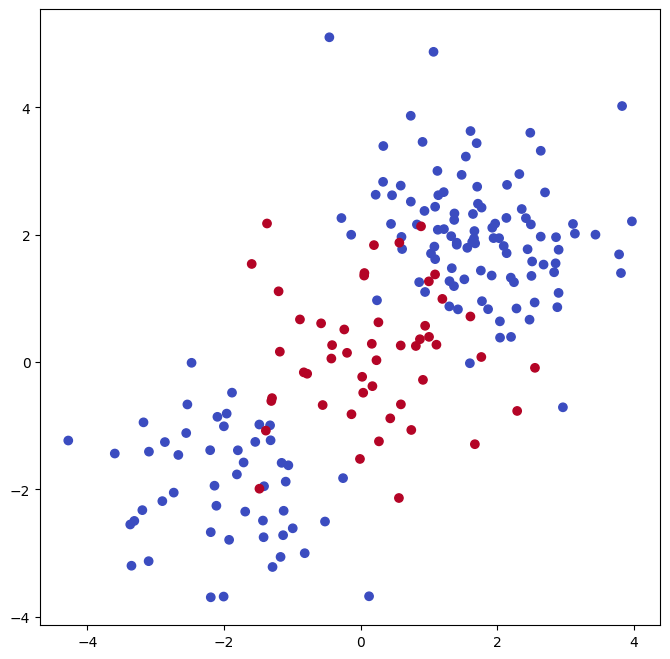

In [ ]:
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm)

In [ ]:
(X_train ,
X_test ,
y_train ,
y_test) = skm.train_test_split(X,
y,
test_size=0.5,
random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train , y_train)

SVC(C=1, gamma=1)

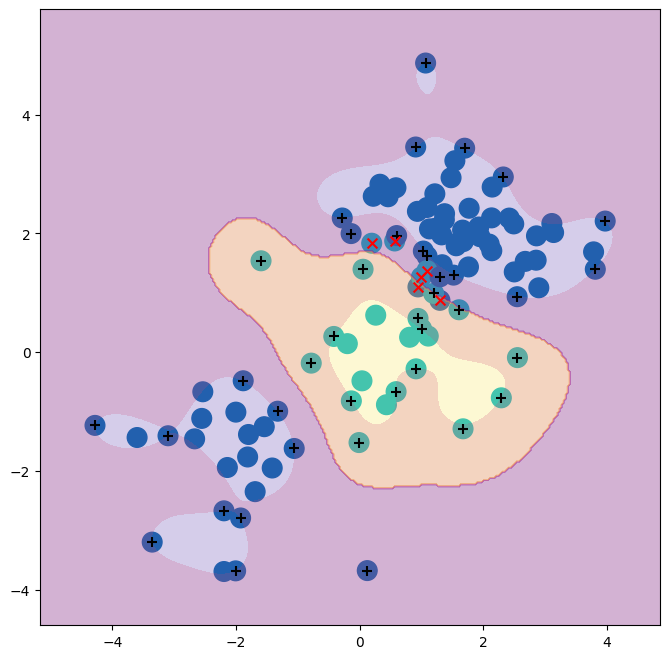

In [ ]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train ,
y_train ,
svm_rbf ,
ax=ax)

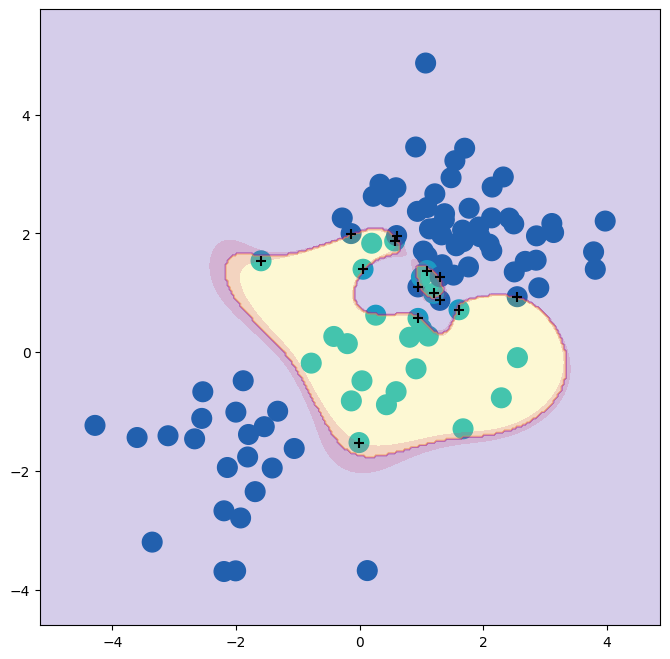

In [ ]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train , y_train)
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train ,
y_train ,
svm_rbf ,
ax=ax)

In [ ]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf ,
{'C':[0.1,1,10,100,1000],
'gamma':[0.5,1,2,3,4]},
refit=True ,
cv=kfold ,
scoring='accuracy');
grid.fit(X_train , y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,69,6
2,6,19


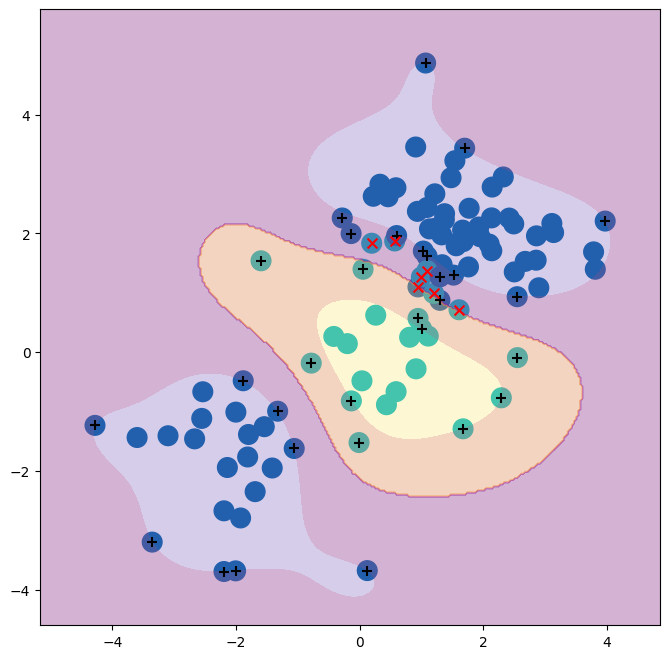

In [ ]:
best_svm = grid.best_estimator_
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train ,
y_train ,
best_svm ,
ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test , y_test)

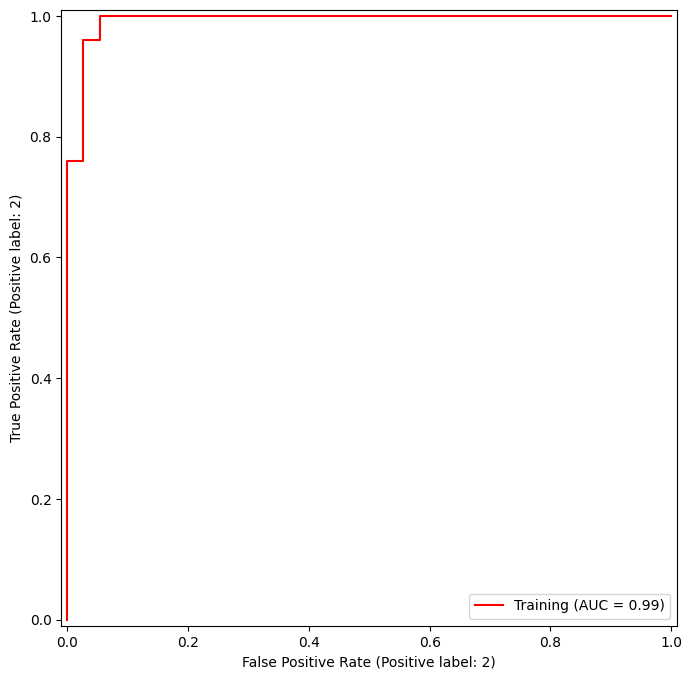

In [ ]:
fig , ax = subplots(figsize=(8,8))
roc_curve(best_svm ,
X_train ,
y_train ,
name='Training',
color='r',
ax=ax);

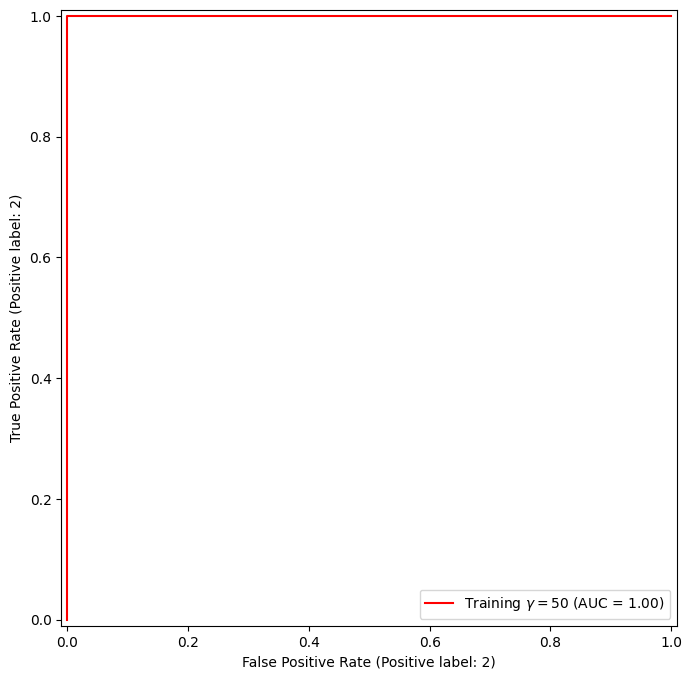

In [ ]:
svm_flex = SVC(kernel="rbf",
gamma=50,
C=1)
svm_flex.fit(X_train , y_train)
fig , ax = subplots(figsize=(8,8))
roc_curve(svm_flex ,
X_train ,
y_train ,
name='Training $\gamma=50$',
color='r',
ax=ax);

In [ ]:
roc_curve(svm_flex ,
X_test ,
y_test ,
name='Test $\gamma=50$',
color='b',
ax=ax)
fig;

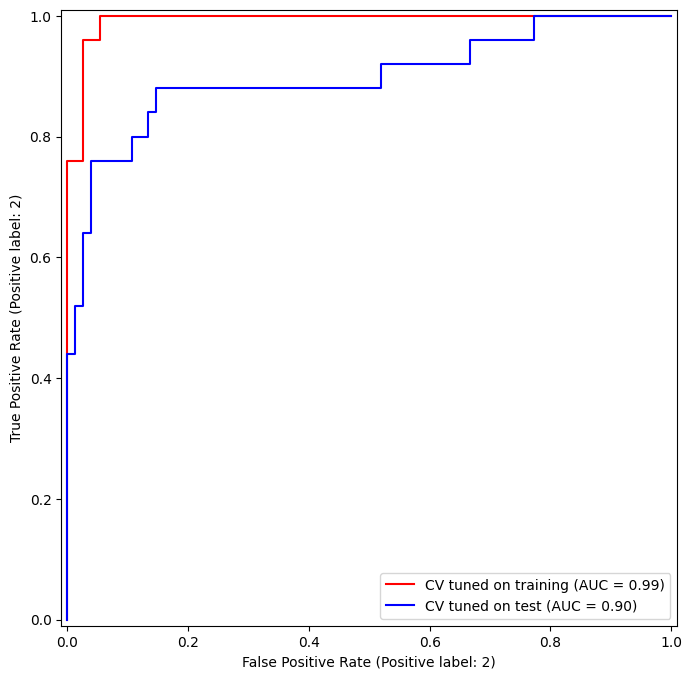

In [ ]:
fig , ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
(X_train , X_test),
(y_train , y_test),
('r', 'b'),
('CV tuned on training',
'CV tuned on test')):
    roc_curve(best_svm ,
    X_,
    y_,
    name=name ,
    ax=ax,
    color=c)

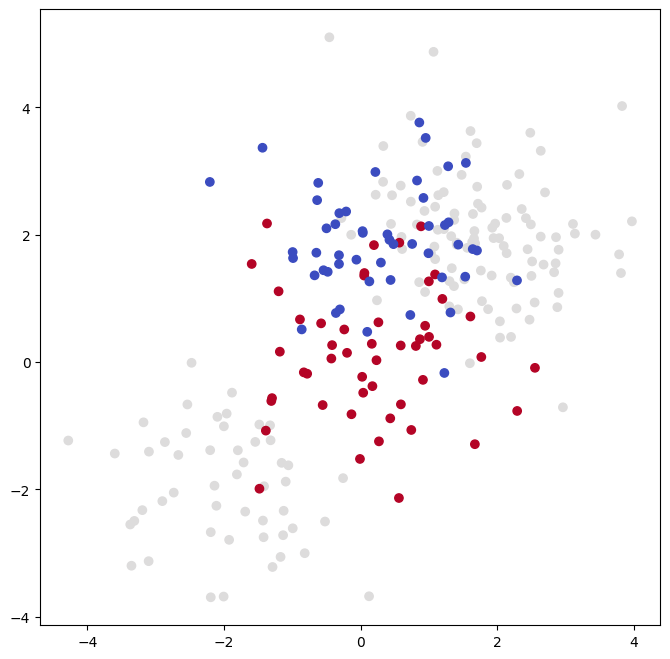

In [ ]:
rng = np.random.default_rng (123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

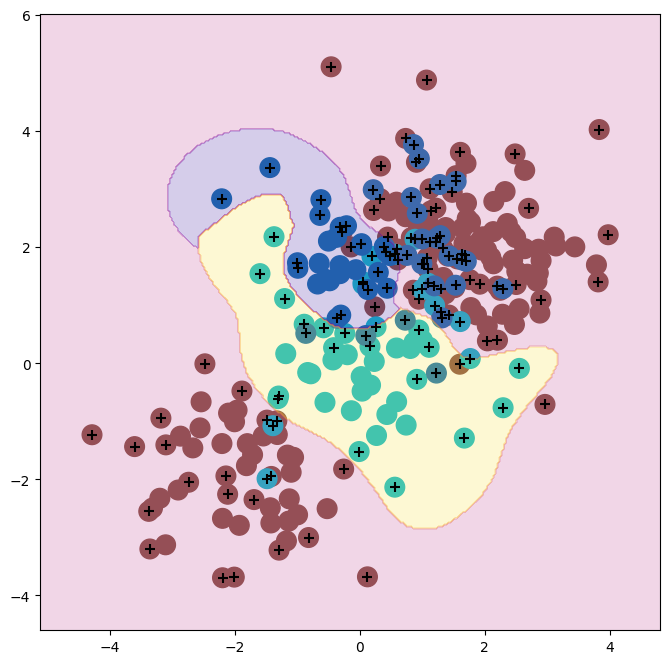

In [ ]:
svm_rbf_3 = SVC(kernel="rbf",
C=10,
gamma=1,
decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_rbf_3 ,
scatter_cmap=cm.tab10 ,
ax=ax)

# Application to Gene Expression Data

In [ ]:
Khan = load_data('Khan')
Khan['xtrain'].shape , Khan['xtest'].shape

((63, 2308), (20, 2308))

In [ ]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [ ]:
confusion_table(khan_linear.predict(Khan['xtest']),
Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
